In [2]:
# === Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import joblib

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.interpolate import make_interp_spline

warnings.filterwarnings("ignore")

## Data Understanding ##

In [4]:
# === Upload dan Baca Dataset ===
from google.colab import files
uploaded = files.upload()

if not uploaded:
    raise ValueError("File belum diupload. Silakan upload dataset terlebih dahulu.")

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.head()

Saving dataset.csv to dataset.csv


,Suhu_Tubuh_C,Frekuensi_Batuk_per_Jam,Skala_Nyeri_Tenggorokan,Tingkat_Sesak_Napas,Durasi_Sakit_Hari,Nyeri_Otot_Sendi_Skala,Sakit_Kepala_Skala,Nafsu_Makan_Penurunan_Skala,Usia_Tahun,Riwayat_Kontak_Positif,Jenis_Penyakit
0,37.8,22,3,2,4,2,2,3,57,1,Pneumonia
1,39.0,36,1,2,10,2,2,3,81,1,Pneumonia
2,40.6,10,4,2,10,2,2,0,69,0,Pneumonia
3,40.2,21,3,2,12,0,0,3,1,1,Pneumonia
4,37.6,19,4,1,10,1,1,0,72,0,Bronkitis


In [5]:
# === Exploratory Data Analysis (EDA) ===
print("\nInformasi Dataset:")
print(df.info())

print("Jumlah data per jenis penyakit:")
print(df['Jenis_Penyakit'].value_counts())

# Statistik deskriptif
df.describe()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suhu_Tubuh_C                 780 non-null    float64
 1   Frekuensi_Batuk_per_Jam      780 non-null    int64  
 2   Skala_Nyeri_Tenggorokan      780 non-null    int64  
 3   Tingkat_Sesak_Napas          780 non-null    int64  
 4   Durasi_Sakit_Hari            780 non-null    int64  
 5   Nyeri_Otot_Sendi_Skala       780 non-null    int64  
 6   Sakit_Kepala_Skala           780 non-null    int64  
 7   Nafsu_Makan_Penurunan_Skala  780 non-null    int64  
 8   Usia_Tahun                   780 non-null    int64  
 9   Riwayat_Kontak_Positif       780 non-null    int64  
 10  Jenis_Penyakit               780 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 67.2+ KB
None
Jumlah data per jenis penyakit:
Jenis_Penyakit
Pneumo

,Suhu_Tubuh_C,Frekuensi_Batuk_per_Jam,Skala_Nyeri_Tenggorokan,Tingkat_Sesak_Napas,Durasi_Sakit_Hari,Nyeri_Otot_Sendi_Skala,Sakit_Kepala_Skala,Nafsu_Makan_Penurunan_Skala,Usia_Tahun,Riwayat_Kontak_Positif
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,37.913462,9.193590,4.096154,0.507692,6.264103,0.998718,1.294872,1.007692,29.114103,0.384615
std,0.996186,8.574956,2.970066,0.814624,4.098529,1.011486,1.026091,1.015890,21.351176,0.486816
min,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.100000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,12.000000,0.000000
50%,37.800000,6.000000,4.000000,0.000000,7.000000,1.000000,1.000000,1.000000,23.500000,0.000000
75%,38.500000,14.250000,7.000000,1.000000,9.000000,2.000000,2.000000,2.000000,42.000000,1.000000
max,41.000000,40.000000,10.000000,3.000000,20.000000,3.000000,3.000000,3.000000,85.000000,1.000000


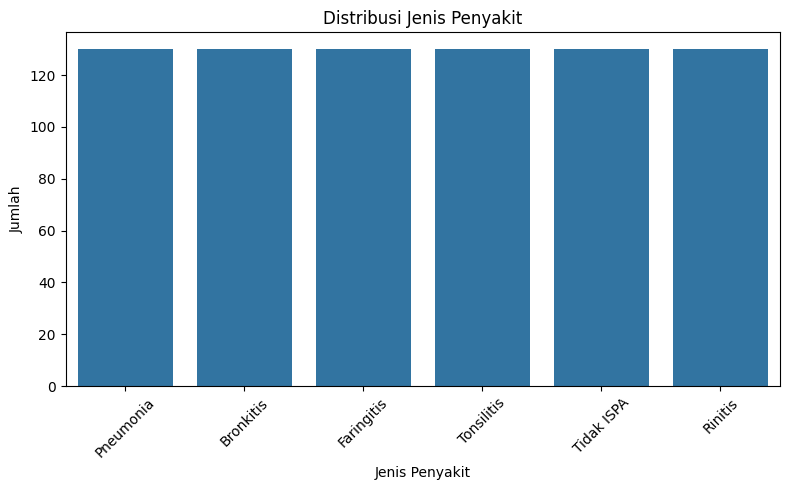

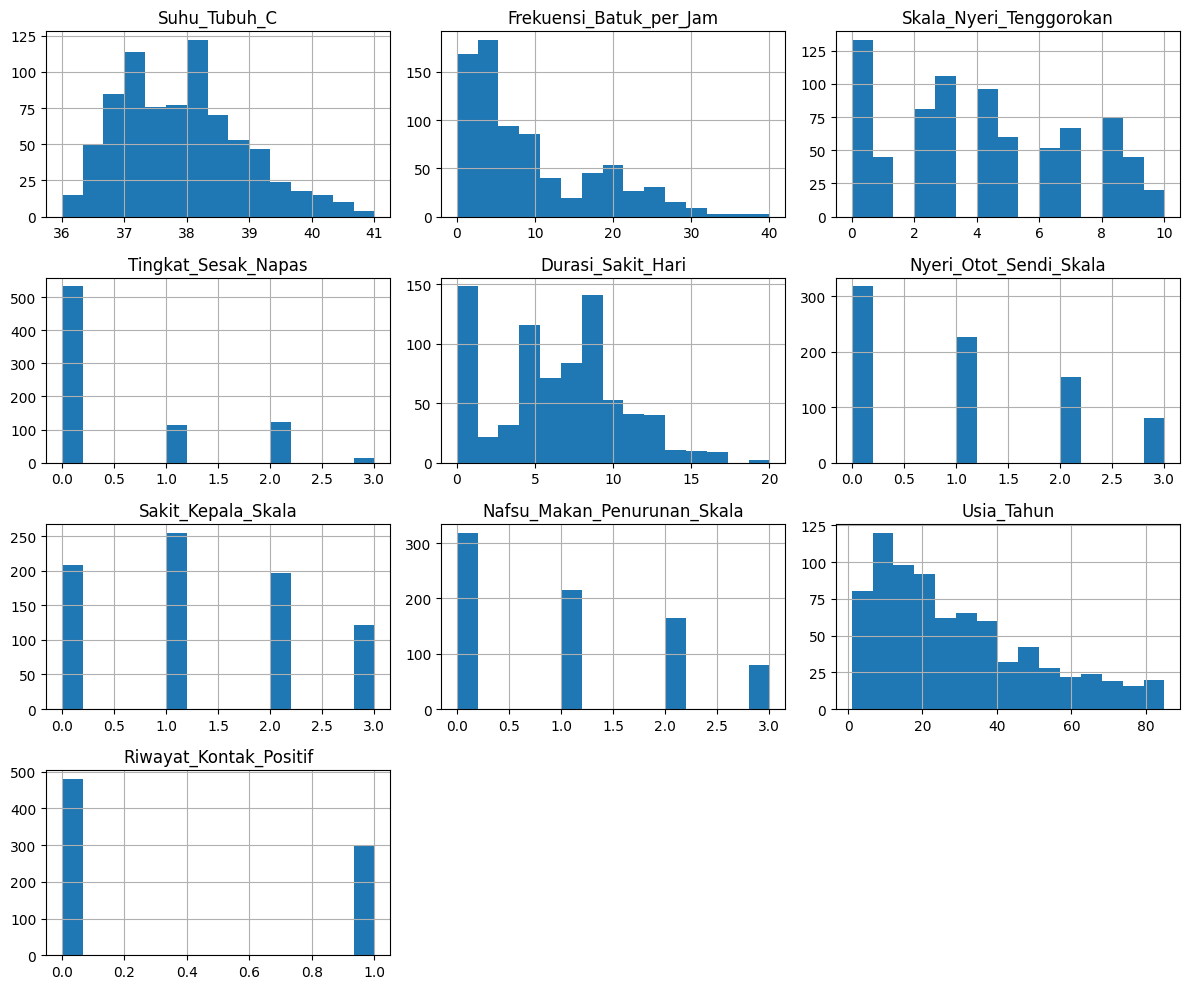

In [6]:
# === Visualisasi Distribusi Diagnosis ===
plt.figure(figsize=(8,5))
sns.countplot(x='Jenis_Penyakit', data=df, order=df['Jenis_Penyakit'].value_counts().index)
plt.title('Distribusi Jenis Penyakit')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Penyakit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot distribusi fitur
df.hist(figsize=(12, 10), bins=15)
plt.tight_layout()
plt.show()

## Data Preparation ##

In [7]:
# === Data Cleaning ===
print("\nJumlah nilai kosong per kolom:")
print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()


Jumlah nilai kosong per kolom:
Suhu_Tubuh_C                   0
Frekuensi_Batuk_per_Jam        0
Skala_Nyeri_Tenggorokan        0
Tingkat_Sesak_Napas            0
Durasi_Sakit_Hari              0
Nyeri_Otot_Sendi_Skala         0
Sakit_Kepala_Skala             0
Nafsu_Makan_Penurunan_Skala    0
Usia_Tahun                     0
Riwayat_Kontak_Positif         0
Jenis_Penyakit                 0
dtype: int64


In [8]:
# === Encoding Label ===
encoder = LabelEncoder()
df['Jenis_Penyakit'] = encoder.fit_transform(df['Jenis_Penyakit'])
target_names = [str(label) for label in encoder.classes_]

# Split Data
X = df.drop(columns=['Jenis_Penyakit'])
y = df['Jenis_Penyakit']

# Bagi dataset jadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Jumlah data latih
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((620, 10), (155, 10), (620,), (155,))

## Modeling ##

In [9]:
# === Inisialisasi dan Training Model ===
model = GaussianNB()
model = CalibratedClassifierCV(model, cv=3)
model.fit(X_train, y_train)

CalibratedClassifierCV(cv=3, estimator=GaussianNB())

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
# === Simpan Model dan Encoder ===
joblib.dump(model, 'model_naive_bayes.joblib')
joblib.dump(encoder, 'label_encoder.joblib')
print("Model dan encoder berhasil disimpan dalam format .joblib.")

Model dan encoder berhasil disimpan dalam format .joblib.


## Evaluation ##

In [12]:
# === Evaluasi model ===
print(f"Akurasi Training: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Akurasi Testing : {accuracy_score(y_test, y_test_pred):.2f}")
print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Akurasi Training: 0.89
Akurasi Testing : 0.85

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

   Bronkitis       0.96      0.86      0.91        29
  Faringitis       0.57      1.00      0.73        24
   Pneumonia       1.00      0.96      0.98        24
     Rinitis       0.87      0.96      0.91        27
  Tidak ISPA       1.00      0.94      0.97        31
  Tonsilitis       1.00      0.25      0.40        20

    accuracy                           0.85       155
   macro avg       0.90      0.83      0.82       155
weighted avg       0.90      0.85      0.84       155



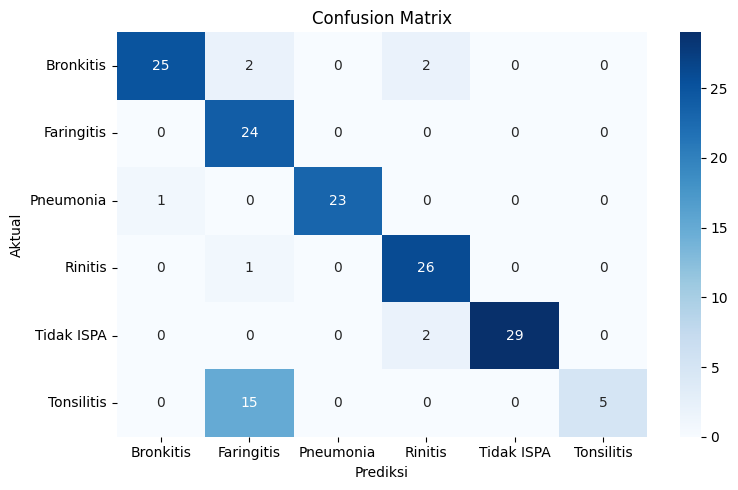

In [13]:
# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Deployment ##

In [15]:
# === Contoh input user ===
input_user = {
    'Suhu_Tubuh_C': 37.7,
    'Frekuensi_Batuk_per_Jam': 10,
    'Skala_Nyeri_Tenggorokan': 1,
    'Tingkat_Sesak_Napas': 1,
    'Durasi_Sakit_Hari': 3,
    'Nyeri_Otot_Sendi_Skala': 1,
    'Sakit_Kepala_Skala': 2,
    'Nafsu_Makan_Penurunan_Skala': 2,
    'Usia_Tahun': 33,
    'Riwayat_Kontak_Positif': 0
}

# Buat DataFrame dari input
input_df = pd.DataFrame([input_user])

# Load model dan encoder
try:
    model = joblib.load('model_naive_bayes.joblib')
    label_encoder = joblib.load('label_encoder.joblib')
except FileNotFoundError:
    print("Error: File model atau encoder tidak ditemukan.")
    exit()

# Prediksi probabilitas
probabilities = model.predict_proba(input_df)[0]
class_labels = label_encoder.classes_

# Temukan kelas dengan probabilitas tertinggi
max_prob_index = np.argmax(probabilities)
predicted_class = class_labels[max_prob_index]
predicted_probability = probabilities[max_prob_index]

# Tampilkan diagnosis dengan format seperti gambar
if predicted_class.lower() == 'tidak ispa':
    print(f"Prediksi: Tidak ISPA")
    print(f"Probabilitas: {predicted_probability:.2f}")
else:
    print(f"Prediksi: ISPA")
    print(f"Jenis ISPA: {predicted_class}")
    print(f"Probabilitas kemungkinan penyakit: {predicted_probability:.2f}")
    print("\nProbabilitas untuk kemungkinan penyakit (lainnya):")
    for i, prob in enumerate(probabilities):
        if i != max_prob_index and prob > 0.01:
            print(f"- {class_labels[i]}: {prob:.2f}")

Prediksi: ISPA
Jenis ISPA: Bronkitis
Probabilitas kemungkinan penyakit: 0.78

Probabilitas untuk kemungkinan penyakit (lainnya):
- Pneumonia: 0.11
- Tonsilitis: 0.09
